<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.layers import Conv2D, Flatten, Dense, Reshape,Conv2DTranspose
from keras.layers.convolutional import Deconvolution2D
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

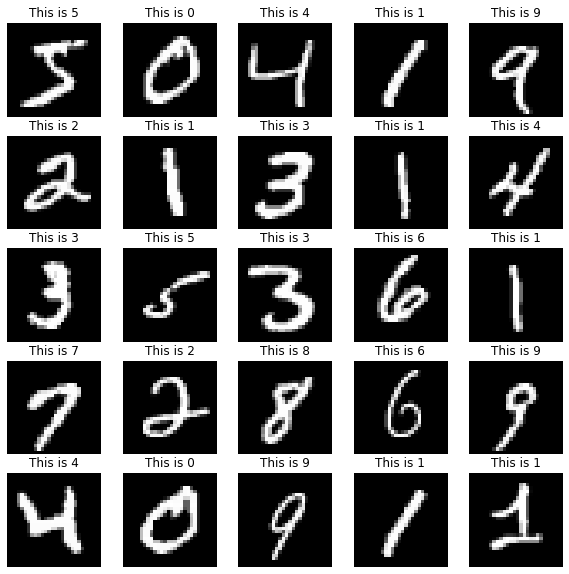

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

fig, axs = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        ax.imshow(x[5*i+j],cmap='gray')
        ax.axis('off')
        ax.set_title('This is '+str(y[5*i+j]))

Convolntal Autoencoder
![picture](https://www.researchgate.net/profile/Xifeng-Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png)

In [21]:
#model = keras.Sequential()

input_img = keras.Input(shape=(28, 28, 1))
x = Conv2D(32, (5, 5),strides=2 ,activation='relu', padding='same')(input_img)
x = Conv2D(64, (5, 5),strides=2 ,activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3),strides=2 ,activation='relu')(x)
x = Flatten()(x)
encoded = Dense(10)(x)

x = Dense(1152,activation='relu')(encoded)
x = Reshape((3,3,128))(x)

x = Conv2DTranspose(64,(3,3),strides=2, activation='relu',padding='valid')(x)
x = Conv2DTranspose(32,(5,5),strides=2, activation='relu',padding='same')(x)
decoded= Conv2DTranspose(1,(5,5),strides=2,padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder .summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                11530     
_________________________________________________________________
dense_3 (Dense)              (None, 1152)              1267

In [25]:
import datetime, os

%load_ext tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
EarlyStopping = keras.callbacks.EarlyStopping(monitor="loss",patience=3,restore_best_weights=True)
ModelCheckpoint = keras.callbacks.ModelCheckpoint('Autoencoder.h5',monitor="loss",save_best_only=True)
TensorBoard = keras.callbacks.TensorBoard(logdir)


autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error,metrics=["loss"])

history =autoencoder.fit(x, x ,epochs=50,callbacks=[EarlyStopping,ModelCheckpoint,TensorBoard])

Epoch 1/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0324 - accuracy: 0.8070
Epoch 2/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0147 - accuracy: 0.8119
Epoch 3/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0131 - accuracy: 0.8127
Epoch 4/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0123 - accuracy: 0.8127
Epoch 5/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0117 - accuracy: 0.8133
Epoch 6/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0113 - accuracy: 0.8137
Epoch 7/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0110 - accuracy: 0.8136
Epoch 8/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0107 - accuracy: 0.8136
Epoch 9/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.0105 - accuracy: 0.8137
Epoch 10/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.010

In [ ]:
%tensorboard --logdir logs

dict_keys(['loss', 'accuracy'])


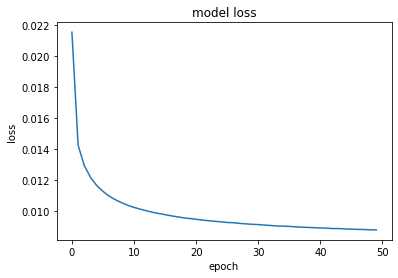

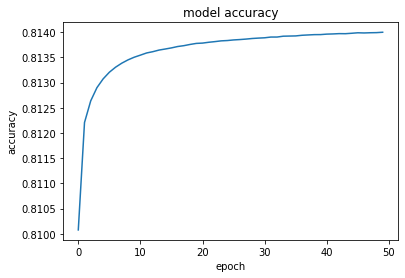

In [38]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


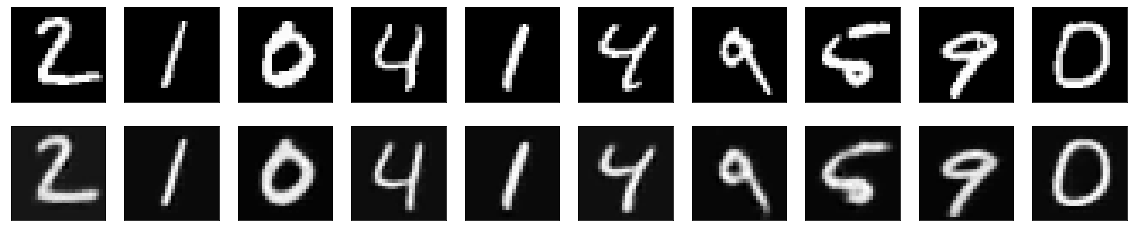

In [32]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()